In [44]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

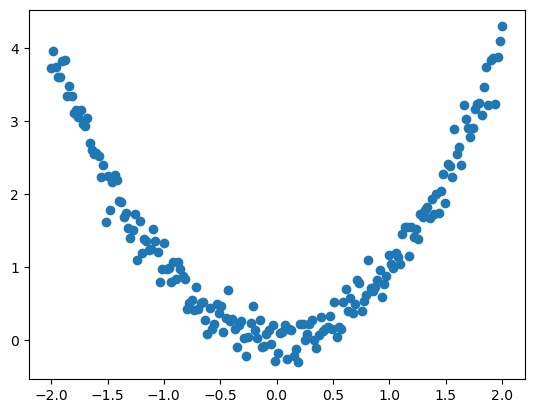

In [45]:
# 生成虚拟数据
# 200个均匀分布的从-2到2的数据，列维度不变，行维度新增
x_data = np.linspace(-2,2,200)[:,np.newaxis]
noise = np.random.normal(0, 0.2, x_data.shape)
y_data = np.square(x_data) + noise
plt.scatter(x_data, y_data)

plt.show()

In [46]:
# 转换格式，变为（100,1）的二维数组，-1表示未知
x_data=x_data.reshape(-1,1)
x_data = torch.FloatTensor(x_data)

y_data = y_data.reshape(-1,1)
y_data = torch.FloatTensor(y_data)

print(y_data.shape)
print(x_data.shape)
# 再转化为变量
inputs = Variable(x_data)
targets = Variable(y_data)
print(inputs.shape)
print(targets.shape)

torch.Size([200, 1])
torch.Size([200, 1])
torch.Size([200, 1])
torch.Size([200, 1])


In [47]:
# 构建神经网络模型，套路相同

class LinearRegression(nn.Module):
    # 初始化，定义网络结构
    def __init__(self):
        # 初始化nnModule
        super(LinearRegression, self).__init__()
        # 定义了一个全连接层，参数为输入值和输出值个数
        # 由于是非线性回归，一层神经网络无法做到，因此需要加入隐藏层
        self.fc1 = nn.Linear(1, 10)
        # 设置激活函数
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(10, 1)
        
    # 前向计算，定义网络计算
    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        outs = self.fc2(x)
        return outs
        

In [48]:
# 实例化模型
model = LinearRegression()

# 定义损失函数，均方差函数
mse_loss = nn.MSELoss()

# 定义优化器，使用随机梯度下降法，传入模型的参数，（学习率）步长0.1
optimizer = torch.optim.SGD(model.parameters(), lr=0.3)

In [49]:
# 展示参数，weight权值，bias偏置值。自行选择是否查看
for name,parameters in model.named_parameters():
    print('name: {},param:{}'.format(name,parameters))

name: fc1.weight,param:Parameter containing:
tensor([[-0.7230],
        [ 0.7905],
        [ 0.5470],
        [-0.3621],
        [-0.8295],
        [-0.6026],
        [-0.6167],
        [-0.3844],
        [ 0.4773],
        [-0.5568]], requires_grad=True)
name: fc1.bias,param:Parameter containing:
tensor([-0.6015,  0.6531,  0.7148, -0.0578, -0.3856,  0.4743, -0.0853,  0.1712,
        -0.3214, -0.8672], requires_grad=True)
name: fc2.weight,param:Parameter containing:
tensor([[ 0.2779,  0.1301, -0.0521, -0.1111,  0.1323, -0.2850,  0.2469, -0.1042,
          0.0875, -0.0910]], requires_grad=True)
name: fc2.bias,param:Parameter containing:
tensor([0.2957], requires_grad=True)


In [50]:
for i in range(2000):
    # 把inputs传给模型，out也就是模型的预测值
    out = model(inputs)
    # 计算损失
    loss = mse_loss(out, targets)
    # 把优化器的梯度清零，否则下一次会累加梯度
    optimizer.zero_grad()
    # 把loss丢进优化器，优化loss，计算梯度，希望梯度尽可能小
    loss.backward()
    # 修改权值
    optimizer.step()
    if i % 200 == 0:
        # 每200次打印损失的值
        print(i, loss.item())

0 2.8671441078186035
200 0.11779140681028366
400 0.07463682442903519
600 0.06932611763477325
800 0.05546225607395172
1000 0.05504341423511505
1200 0.05524924397468567
1400 0.05504467338323593
1600 0.05387789383530617
1800 0.0520918145775795


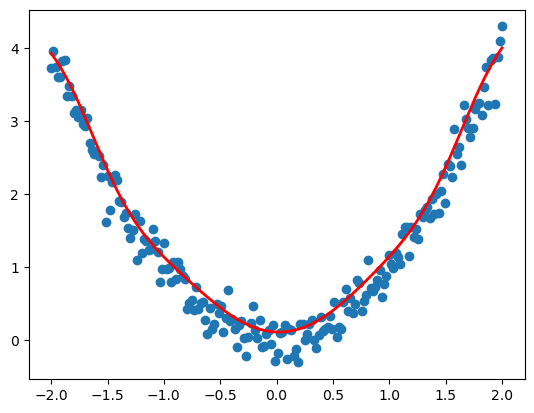

In [51]:
# 此时传入inputs，模型的参数是最后一次使用优化器后的参数。返回预测值
y_pred = model(inputs)
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data.numpy(), color='red',lw = 2)

In [52]:
for name,parameters in model.named_parameters():
    print('name: {},param:{}'.format(name,parameters))

name: fc1.weight,param:Parameter containing:
tensor([[-2.2002],
        [ 0.4409],
        [-0.0149],
        [-0.0613],
        [-1.5939],
        [-2.1397],
        [-0.1569],
        [-0.4359],
        [ 1.6177],
        [-0.0228]], requires_grad=True)
name: fc1.bias,param:Parameter containing:
tensor([-3.6114e+00, -1.4952e-02,  4.1451e-04,  1.7172e-03, -9.6477e-01,
         3.5416e+00,  4.5269e-03,  1.6024e-02, -1.0754e+00, -8.4611e-05],
       requires_grad=True)
name: fc2.weight,param:Parameter containing:
tensor([[ 1.6028e+00,  1.0127e-02, -4.2220e-04, -1.7333e-03,  7.8667e-01,
         -1.6385e+00, -4.3256e-03, -1.1210e-02,  8.0443e-01, -1.2363e-03]],
       requires_grad=True)
name: fc2.bias,param:Parameter containing:
tensor([4.5660], requires_grad=True)
